In [1]:
# Beginning imports such as matplotlib and pandas
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
inspector = inspect(engine)

In [4]:
# View all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
## Find the most recent date in the data set.
# First find the columns in the table 'measurement'
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Then find the final date of the date column
last_date = session.query(func.max(measurement.date)).all()
last_date

[('2017-08-23',)]

In [9]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.date.fromisoformat(last_date[0][0])
print(f"end_date = {end_date}")
# Calculate the date one year from the last date in data set.
begin_date = end_date - dt.timedelta(days=365)
print(f"begin_date = {begin_date}")

end_date = 2017-08-23
begin_date = 2016-08-23


In [10]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= begin_date)\
                    .filter(measurement.date <= end_date).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [11]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(data=precipitation, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(['Date'], ascending=True).reset_index(drop=True)

prcp_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


[]

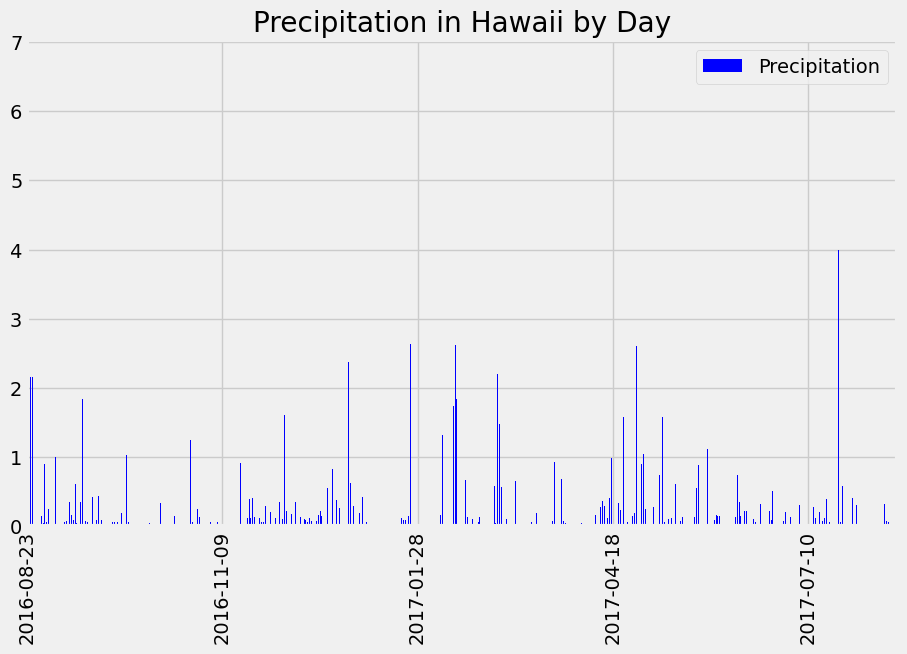

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
# So that we don't get 2,330 x_ticks, we use numpy and matplotlib functions
# Setting the x ticks to every 500 data points instead of every 1
major_x_ticks_numbers = np.arange(0, len(prcp_df)+1, 500)
major_x_ticks = [prcp_df["Date"][x] for x in major_x_ticks_numbers]

fig1 = prcp_df.plot(kind = 'bar', facecolor = 'blue', title = 'Precipitation in Hawaii by Day', figsize = (10,6))
fig1.set_xticks(major_x_ticks_numbers)
fig1.set_xticklabels(major_x_ticks)
fig1.plot()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
no_of_stations = session.query(func.count(station.station)).all()
no_of_stations

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
sel = [measurement.station, func.count(measurement.id)]
active_stations = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

# List the stations and their counts in descending order.
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# In the spirit of not hard coding, we can use the following code to get the most active station
most_active_station = active_stations[0][0]

# We can now find the specific measurements at said station
station_tobs = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()
station_tobs

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Frequency of Temperature in Hawaii for a year')

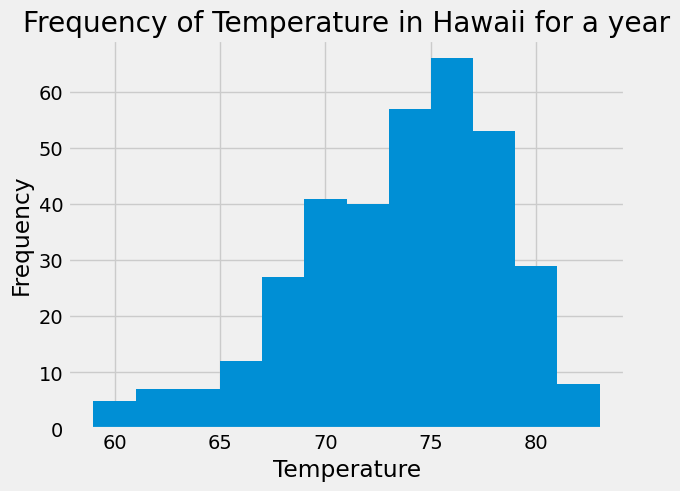

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# with bins=12

#The query
histogram_query = session.query(measurement.tobs).filter(measurement.station == most_active_station).\
                    filter(measurement.date >= begin_date).filter(measurement.date <= end_date).all()


# I'm not exactly sure why, but plotting 'histogram_query' as the data doesn't work
# So I just made a list of the data instead
data = [histogram_query[x][0] for x in range(len(histogram_query))]

#The actual plot
numb_bins = 12
plt.hist(data, bins=numb_bins)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency of Temperature in Hawaii for a year')

In [18]:
## Close Session
session.close()